In [9]:
# Import de librerias
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [10]:
# Import de librerias
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [11]:
# Crea un modelo de red neuronal
# 'sequential' se refiere a que cada capa recibe como entrada la salida de la capa anterior
model = keras.Sequential()

# Agrega una capa de entrada
# input --> arrays of shape (*, 2)
# output --> arrays of shape (*, 4)
model.add(Dense(4, input_dim= 2))

# Función de activación con la función 'tanh' *Esta función es no lineal
# tanh(x) = (e^x - e^-x) / (e^x + e^-x)
model.add(Activation('tanh'))

# Después de la primera capa
# ya no es necesario especificar el tamaño de la entrada
model.add(Dense(2))

# Función de activación sigmoide
# sigmoid(x) = 1 / (1 + e^-x)
model.add(Activation('sigmoid'))

# Capa de salida (1 neurona)
model.add(Dense(1))

# Función de activación sigmoide
# sigmoid(x) = 1 / (1 + e^-x)
model.add(Activation('sigmoid'))

In [12]:
X = np.array([[0,0],[0,1],[1,0],[1,1]]) # entradas
y = np.array([[0],[1],[1],[0]]) # resultados
print(X)
print()
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]

[[0]
 [1]
 [1]
 [0]]


In [13]:
# Crea un optimizador de descenso de gradiente estocástico (SGD) 
# momentum --> evita que los pesos se atasquen en un mínimo local
opt = keras.optimizers.SGD(learning_rate=0.05, momentum=0.1, name='SGD')

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')

In [8]:
# Entrenamiento
history = model.fit(X,y, batch_size=1, epochs=2000, verbose=0)
print(history.history.keys()) # perdida y precisión

dict_keys(['loss', 'accuracy'])


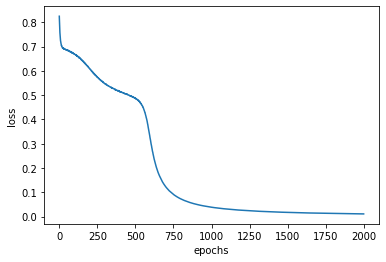

In [14]:
# Plot de la perdida
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

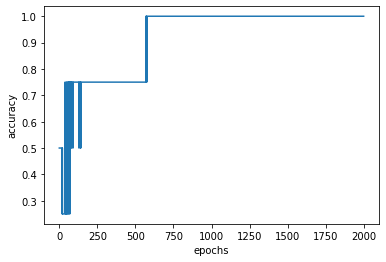

In [15]:
# Plot de la precisión 
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

In [16]:
# Predicciones
print(model.predict(X))

1/1 [==============================] - 0s 134ms/step
[[0.42076606]
 [0.40272105]
 [0.37871096]
 [0.38493574]]


In [17]:
# matriz de confusion
cm= confusion_matrix(y,np.around(model.predict(X)))
print(cm)

1/1 [==============================] - 0s 16ms/step
[[2 0]
 [2 0]]


In [18]:
# classification report
print(classification_report(y,np.around(model.predict(X))))

1/1 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Datos de entrada
X1 = np.array([[1,1,1,0,1,1,1],
               [0,0,1,0,0,1,0],
               [1,0,1,1,1,0,0],
               [1,0,1,1,0,1,1],
               [0,1,1,1,0,1,0],
               [1,1,0,1,0,1,1],
               [1,1,0,1,1,1,1],
               [1,0,1,0,0,1,0],
               [1,1,1,1,1,1,1],
               [1,1,1,1,0,1,1]])
print(X1)

[[1 1 1 0 1 1 1]
 [0 0 1 0 0 1 0]
 [1 0 1 1 1 0 0]
 [1 0 1 1 0 1 1]
 [0 1 1 1 0 1 0]
 [1 1 0 1 0 1 1]
 [1 1 0 1 1 1 1]
 [1 0 1 0 0 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1]]


In [20]:
# Datos de salida (verdaderos)
y1 = np.array([[1,0,0,0,0,0,0,0,0,0], # 0
               [0,1,0,0,0,0,0,0,0,0], # 1
               [0,0,1,0,0,0,0,0,0,0], # 2
               [0,0,0,1,0,0,0,0,0,0], # 3
               [0,0,0,0,1,0,0,0,0,0], # 4
               [0,0,0,0,0,1,0,0,0,0], # 5
               [0,0,0,0,0,0,1,0,0,0], # 6
               [0,0,0,0,0,0,0,1,0,0], # 7
               [0,0,0,0,0,0,0,0,1,0], # 8
               [0,0,0,0,0,0,0,0,0,1]]) # 9
print(y1)

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [21]:
# Crea un modelo de red neuronal
model = keras.Sequential()

# Agrega una capa de entrada
# input --> arrays of shape (*, 7)
# output --> arrays of shape (*, 15)
model.add(Dense(15, input_dim= 7))

# Función de activación 'tanh'
# tanh(x) = (e^x - e^-x) / (e^x + e^-x)
model.add(Activation('tanh'))

# Capa de salida (1 neurona)
model.add(Dense(10))

# Función de activación sigmoide
# sigmoid(x) = 1 / (1 + e^-x)
model.add(Activation('sigmoid'))

In [22]:
# Optimización de descenso de gradiente estocástico
# No aplica el momentum Nesterov
opt = keras.optimizers.SGD(learning_rate=0.09, momentum=0.1, 
                           nesterov=False, name='SGD')

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')

In [23]:
# Entrenamiento
history = model.fit(X1,y1, batch_size=1, epochs=500, verbose=0)

In [24]:
# Predicciones
print(np.around(model.predict(X1)))

1/1 [==============================] - 0s 44ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


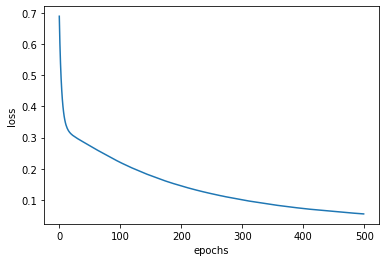

In [25]:
# Plot de la perdida
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

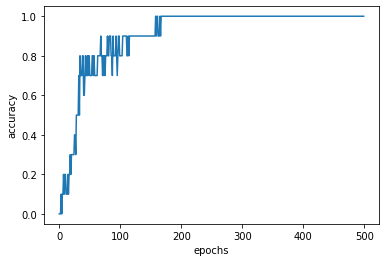

In [26]:
# Plot de la precisión 
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

In [27]:
# La entrada X será la misma que X1
# Resultados con 1 salida
y2 = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
print(y2)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [28]:
# Crea un modelo de red neuronal
model = keras.Sequential()

# Agrega una capa de entrada
# input --> arrays of shape (*, 7)
# output --> arrays of shape (*, 15)
model.add(Dense(15, input_dim=7))

# Función de activación sigmoide
# sigmoid(x) = 1 / (1 + e^-x)
model.add(Activation('sigmoid'))

# Capa de salida (1 neurona)
model.add(Dense(1))

In [29]:
# Optimizador Adam
opt = keras.optimizers.Adam(learning_rate=0.05, name='Adam')

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer=opt, metrics='accuracy')

In [30]:
# Entrenamiento
history = model.fit(X1,y2, batch_size=1, epochs=150, verbose=0)

In [31]:
# Predicciones
print(np.around(model.predict(X1)))

1/1 [==============================] - 0s 46ms/step
[[-0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]]


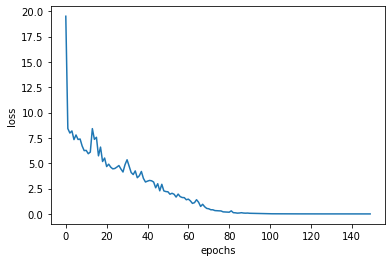

In [32]:
# Plot de la perdida
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

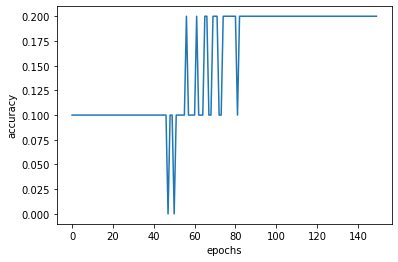

In [33]:
# Plot de la precisión 
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

In [34]:
# matriz de confusion
cm= confusion_matrix(y2,np.around(model.predict(X1)))
print(cm)

1/1 [==============================] - 0s 18ms/step
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [35]:
# classification report
print(classification_report(y2,np.around(model.predict(X1))))

1/1 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

